# Check consistency
## Goal

This file enables the execution of some examples extracted from `pm/dataviz2/99_sandbox.md` to ensure :
- the same code run 
- and give the sames outputs

While using those runtime scenarios : 
- the `pm-codex` system
- a local instance of Jupyter 
- a typical `python3 <filename.py>` execution

## Preliminary requirements
- Installing Python and the necessary libraries (`matplotlib` and `bokeh`).
- Refer to [the Python installation documentation](https://maths.pm/pm/dataviz2/01_installing_python.md) (specific for this course).


## Python version: ideal case


**Executing**

```python
import sys
print(sys.version_info)
``` 

**Should display**
```bash
sys.version_info(major=3, minor=13, micro=5, releaselevel='final', serial=0)

```



## Checking current version used
**See code below and compare its output with the above mentions**

In [2]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=13, micro=5, releaselevel='final', serial=0)


## Versions

In [3]:
import ipykernel
import numpy as np
import pandas as pd
import matplotlib
import bokeh

print(f"ipykernel: {ipykernel.__version__}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"bokeh: {bokeh.__version__}")

ipykernel: 6.30.1
numpy: 2.3.2
pandas: 2.3.2
matplotlib: 3.10.5
bokeh: 3.8.0


## Tests with code from `dataviz2/99_sandbox.md` 
**Titles used below are the same than in the above mentioned markdown file**

### `matplotlib` (+ `pandas`) examples

#### Simple `matplotlib` example

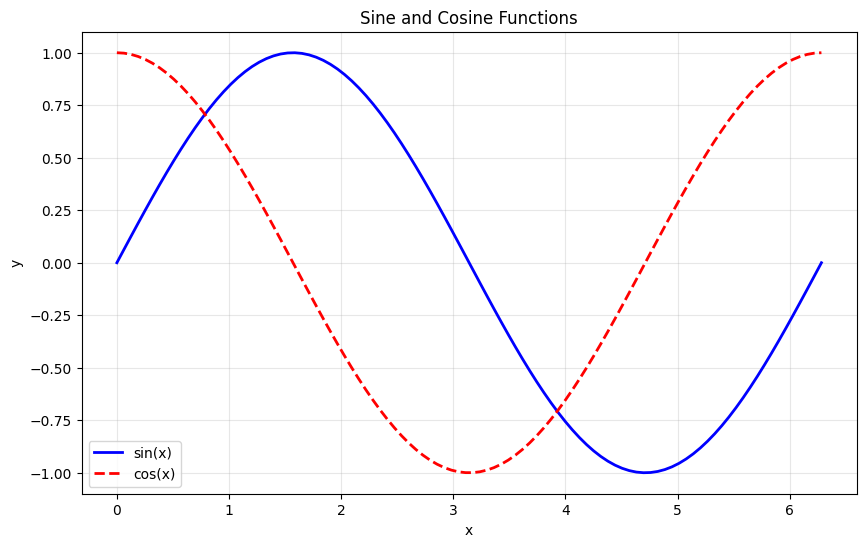

Plot generated successfully!


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib

# Suppress matplotlib font warnings for cleaner output
warnings.filterwarnings('ignore', message='findfont: Generic family')
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Use available fallback font

# Create data
x = np.linspace(0, 2 * np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_sin, 'b-', label='sin(x)', linewidth=2)
plt.plot(x, y_cos, 'r--', label='cos(x)', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine and Cosine Functions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Plot generated successfully!")

#### `pandas`-only example

In [5]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
  'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
  'Age': [25, 30, 35, 28, 32],
  'Score': [85, 92, 78, 91, 88],
  'Department': ['IT', 'HR', 'IT', 'Finance', 'HR']
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)
print("\n" + "="*50 + "\n")

# Basic statistics
print("Statistics:")
print(df.describe())
print("\n" + "="*50 + "\n")

# Group by department
print("Average score by department:")
dept_avg = df.groupby('Department')['Score'].mean()
print(dept_avg)

Original DataFrame:
      Name  Age  Score Department
0    Alice   25     85         IT
1      Bob   30     92         HR
2  Charlie   35     78         IT
3    David   28     91    Finance
4      Eve   32     88         HR


Statistics:
             Age      Score
count   5.000000   5.000000
mean   30.000000  86.800000
std     3.807887   5.630275
min    25.000000  78.000000
25%    28.000000  85.000000
50%    30.000000  88.000000
75%    32.000000  91.000000
max    35.000000  92.000000


Average score by department:
Department
Finance    91.0
HR         90.0
IT         81.5
Name: Score, dtype: float64


#### `pandas` + `matplotlib` time series example

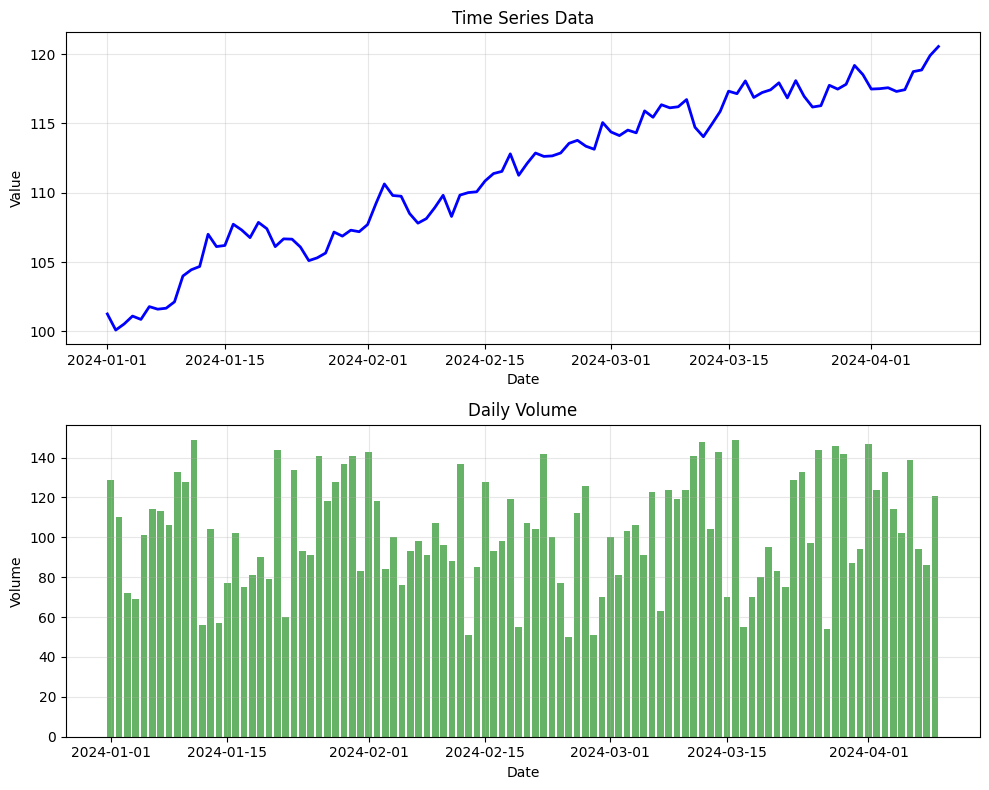

Data shape: (100, 3)
Date range: 2024-01-01 00:00:00 to 2024-04-09 00:00:00
Value range: 100.09 to 120.55


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib

# Suppress matplotlib font warnings for cleaner output
warnings.filterwarnings('ignore', message='findfont: Generic family')
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Use available fallback font

# Create sample time series data
dates = pd.date_range('20240101', periods=100)
df = pd.DataFrame({
  'date': dates,
  'value': np.random.randn(100).cumsum() + 100,
  'volume': np.random.randint(50, 150, 100)
})

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot time series
ax1.plot(df['date'], df['value'], 'b-', linewidth=2)
ax1.set_title('Time Series Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.grid(True, alpha=0.3)

# Plot volume bars
ax2.bar(df['date'], df['volume'], color='green', alpha=0.6)
ax2.set_title('Daily Volume')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Data shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Value range: {df['value'].min():.2f} to {df['value'].max():.2f}")

### `bokeh` interactive plots

#### 🔴 Bokeh Interactive Plot Example for `pm-codex`
🚨 This example won't work here (no error but no display) - because it's not the right syntax for notebooks

In [7]:
# 🚀 ORIGINAL VERSION - Works with your Pyodide wrapper
# 📦 Import Bokeh plotting + document
from bokeh.plotting import figure, curdoc  
# 🎯 Import hover functionality
from bokeh.models import HoverTool   

# 🔢 Import numerical operations     
import numpy as np                          

# 🔢 100 points from 0 to 4π (2 sine cycles)
x = np.linspace(0, 4*np.pi, 100)           
# 📈 Calculate sine values for each x
y = np.sin(x)                              

# 📝 Plot title: `title` argument
# 📏 Plot width in pixels: `width` argument
# 📏 Plot height in pixels: `height` argument
# 🛠️ Interactive tools available: `tools` argument
p = figure(
    title="Interactive Sine Wave - Try zooming and panning!",  
    width=600,                             
    height=400,                           
    tools="pan,wheel_zoom,box_zoom,reset"  
)

# 📊 Blue sine curve
p.line(x, y, legend_label="sin(x)", line_width=2, color='navy')  
# 🔴 Red dots every 5th point
p.scatter(x[::5], y[::5], size=8, color='red', alpha=0.5)      

# 💬 Add hover functionality: show coordinates on hover
hover = HoverTool(tooltips=[("(x,y)", "($x, $y)")])  
# ➕ Add hover tool to plot
p.add_tools(hover)                         

# 🎨 Customize plot appearance
# 📊 X-axis label
p.xaxis.axis_label = "x"                   
# 📊 Y-axis label
p.yaxis.axis_label = "sin(x)"             
# 👁️ Click legend to hide/show lines
p.legend.click_policy = "hide"             

# 📺 Display plot in document (`pm-codex`): `curdoc().add_root(p)`
curdoc().add_root(p)                       

# 📢 Success messages
print("✅ Interactive Bokeh plot created!")
print("🎯 Use mouse to pan, scroll to zoom, hover for values!")


✅ Interactive Bokeh plot created!
🎯 Use mouse to pan, scroll to zoom, hover for values!


In [8]:
#### 🟢 Bokeh Interactive Plot Example for `Jupyter`

In [9]:
# 📚 JUPYTER VERSION - Works in standard JupyterLab
# 📦 Import plotting + show function
from bokeh.plotting import figure, show   
# ❌ OLD: curdoc not needed for Jupyter
# from bokeh.plotting import figure, curdoc 
# ✨ NEW: Enable notebook output mode
from bokeh.io import output_notebook    
# 🎯 Import hover functionality
from bokeh.models import HoverTool   

# 🔢 Import numerical operations
import numpy as np                          

# 🔧 CRITICAL: Specific NOTEBOOK: Enable Jupyter notebook display mode
# ✨ Specific NOTEBOOK: Tell Bokeh to render in notebook cells
output_notebook()                           

# 🔢 100 points from 0 to 4π (2 sine cycles)
x = np.linspace(0, 4*np.pi, 100)           
# 📈 Calculate sine values for each x
y = np.sin(x)                              

# 📝 Plot title
# 📏 Plot width in pixels
# 📏 Plot height in pixels
# 🛠️ Interactive tools available
p = figure(
    title="Interactive Sine Wave - Try zooming and panning!",  
    width=600,                             
    height=400,                            
    tools="pan,wheel_zoom,box_zoom,reset"  
)

# 📊 Blue sine curve
p.line(x, y, legend_label="sin(x)", line_width=2, color='navy')  
# 🔴 Red dots every 5th point
p.scatter(x[::5], y[::5], size=8, color='red', alpha=0.5)       

# 💬 Add hover functionality: show coordinates on hover
hover = HoverTool(tooltips=[("(x,y)", "($x, $y)")])  
# ➕ Add hover tool to plot
p.add_tools(hover)                         

# 🎨 Customize plot appearance
# 📊 X-axis label
p.xaxis.axis_label = "x"        
# 📊 Y-axis label
p.yaxis.axis_label = "sin(x)"       
# 👁️ Click legend to hide/show lines
p.legend.click_policy = "hide"             

# 📺 Display plot (Jupyter method)
# ✨ NEW: Specific NOTEBOOK: Display plot directly in cell output
show(p)        
# ❌ OLD: Not needed for Jupyter
# curdoc().add_root(p)                     

# 📢 Success messages
print("✅ Interactive Bokeh plot created!")
print("🎯 Use mouse to pan, scroll to zoom, hover for values!")

Loading BokehJS ...

✅ Interactive Bokeh plot created!
🎯 Use mouse to pan, scroll to zoom, hover for values!


In [10]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

# Enable notebook output
output_notebook()

# Create simple data
x = [1, 2, 3, 4, 5]
y = [2, 5, 3, 8, 7]

# Create plot
p = figure(
    title="Depreciation Warning Demo",
    width=400, 
    height=300,
    tools="pan,wheel_zoom,reset"
)

# Add circles
p.circle(x, y, size=15, color='red', alpha=0.6)

# Display in notebook
show(p)

Loading BokehJS ...

## `bokeh` interactive plots

### 🔴 Working example (for `pm-codex`)

In [11]:
# 🚀 ORIGINAL VERSION - Works with your Pyodide wrapper
# 📦 Import Bokeh plotting + document
from bokeh.plotting import figure, curdoc  
# 🎯 Import hover functionality
from bokeh.models import HoverTool     
# 🔢 Import numerical operations     
import numpy as np                          

# 🔢 100 points from 0 to 4π (2 sine cycles)
x = np.linspace(0, 4*np.pi, 100)           
# 📈 Calculate sine values for each x
y = np.sin(x)                              

# 📝 Plot title: `title` argument
# 📏 Plot width in pixels: `width` argument
# 📏 Plot height in pixels: `height` argument
# 🛠️ Interactive tools available: `tools` argument
p = figure(
  title="Interactive Sine Wave - Try zooming and panning!",  
  width=600,                             
  height=400,                           
  tools="pan,wheel_zoom,box_zoom,reset"  
)

# 📊 Blue sine curve
p.line(x, y, legend_label="sin(x)", line_width=2, color='navy')  
# 🔴 Red dots every 5th point
p.scatter(x[::5], y[::5], size=8, color='red', alpha=0.5)      

# 💬 Add hover functionality: show coordinates on hover
hover = HoverTool(tooltips=[("(x,y)", "($x, $y)")])  
# ➕ Add hover tool to plot
p.add_tools(hover)                         

# 🎨 Customize plot appearance
# 📊 X-axis label
p.xaxis.axis_label = "x"                   
# 📊 Y-axis label
p.yaxis.axis_label = "sin(x)"             
# 👁️ Click legend to hide/show lines
p.legend.click_policy = "hide"             

# 📺 Display plot in document (`pm-codex`): `curdoc().add_root(p)`
curdoc().add_root(p)                       

# 📢 Success messages
print("✅ Interactive Bokeh plot created!")
print("🎯 Use mouse to pan, scroll to zoom, hover for values!")

✅ Interactive Bokeh plot created!
🎯 Use mouse to pan, scroll to zoom, hover for values!


### 🟢 Working example (for `jupyter`)

In [12]:
# 📚 JUPYTER VERSION - Works in standard JupyterLab
# 📦 Import plotting + show function
from bokeh.plotting import figure, show   
# ❌ OLD: curdoc not needed for Jupyter
# from bokeh.plotting import figure, curdoc 
# ✨ NEW: Enable notebook output mode
from bokeh.io import output_notebook    
# 🎯 Import hover functionality
from bokeh.models import HoverTool   

# 🔢 Import numerical operations
import numpy as np                          

# 🔧 CRITICAL: Specific NOTEBOOK: Enable Jupyter notebook display mode
# ✨ Specific NOTEBOOK: Tell Bokeh to render in notebook cells
output_notebook()                           

# 🔢 100 points from 0 to 4π (2 sine cycles)
x = np.linspace(0, 4*np.pi, 100)           
# 📈 Calculate sine values for each x
y = np.sin(x)                              

# 📝 Plot title
# 📏 Plot width in pixels
# 📏 Plot height in pixels
# 🛠️ Interactive tools available
p = figure(
  title="Interactive Sine Wave - Try zooming and panning!",  
  width=600,                             
  height=400,                            
  tools="pan,wheel_zoom,box_zoom,reset"  
)

# 📊 Blue sine curve
p.line(x, y, legend_label="sin(x)", line_width=2, color='navy')  
# 🔴 Red dots every 5th point
p.scatter(x[::5], y[::5], size=8, color='red', alpha=0.5)       

# 💬 Add hover functionality: show coordinates on hover
hover = HoverTool(tooltips=[("(x,y)", "($x, $y)")])  
# ➕ Add hover tool to plot
p.add_tools(hover)                         

# 🎨 Customize plot appearance
# 📊 X-axis label
p.xaxis.axis_label = "x"        
# 📊 Y-axis label
p.yaxis.axis_label = "sin(x)"       
# 👁️ Click legend to hide/show lines
p.legend.click_policy = "hide"             

# 📺 Display plot (Jupyter method)
# ✨ NEW: Specific NOTEBOOK: Display plot directly in cell output
show(p)        
# ❌ OLD: Not needed for Jupyter
# curdoc().add_root(p)                     

# 📢 Success messages
print("✅ Interactive Bokeh plot created!")
print("🎯 Use mouse to pan, scroll to zoom, hover for values!")

Loading BokehJS ...

✅ Interactive Bokeh plot created!
🎯 Use mouse to pan, scroll to zoom, hover for values!


## Interactive Plot with Widgets

### Using ipywidgets for Interactive Visualization

This section demonstrates how to create interactive plots with widgets that allow users to control various parameters of the visualization in real-time.


In [13]:
# Import required libraries for interactive widgets
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress matplotlib font warnings
warnings.filterwarnings('ignore', message='findfont: Generic family')

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


### Example 1: Interactive Sine Wave with Adjustable Parameters

This example creates an interactive sine wave where you can adjust:
- **Amplitude**: Controls the height of the wave
- **Frequency**: Controls how many cycles appear
- **Phase**: Shifts the wave left or right
- **Show Grid**: Toggle the grid on/off


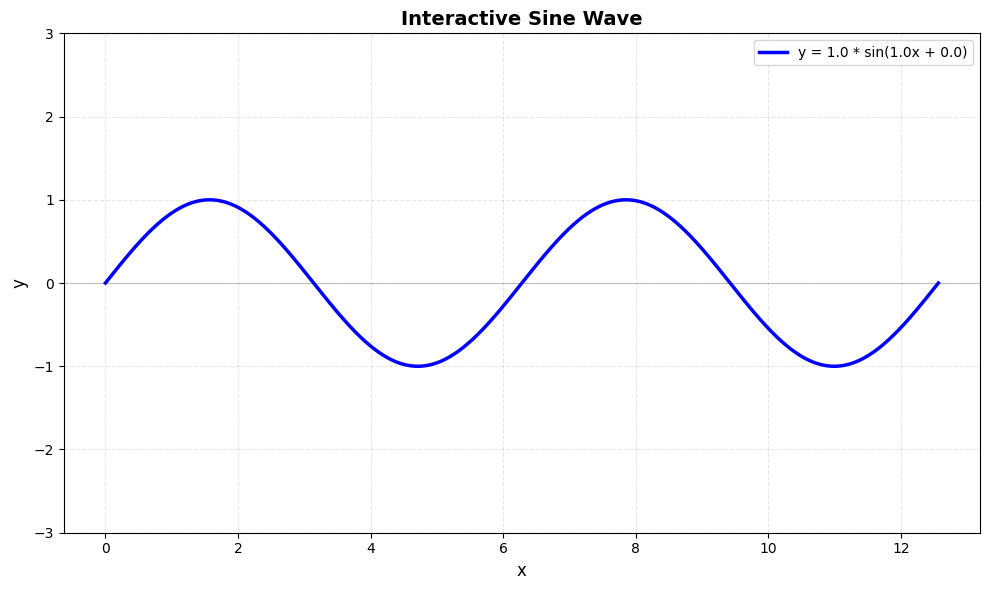

interactive(children=(FloatSlider(value=1.0, description='Amplitude:', max=3.0, min=0.1), FloatSlider(value=1.…

🎯 Use the sliders above to adjust the sine wave parameters!


In [14]:
# Create interactive sine wave plot with widgets
from ipywidgets import interact, FloatSlider, Checkbox

def plot_sine_wave(amplitude=1.0, frequency=1.0, phase=0.0, show_grid=True):
    """
    Plot a sine wave with adjustable parameters
    
    Parameters:
    - amplitude: Height of the wave
    - frequency: Number of cycles
    - phase: Phase shift in radians
    - show_grid: Whether to show grid lines
    """
    # Generate x values
    x = np.linspace(0, 4 * np.pi, 1000)
    # Calculate y values with parameters
    y = amplitude * np.sin(frequency * x + phase)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', linewidth=2.5, label=f'y = {amplitude:.1f} * sin({frequency:.1f}x + {phase:.1f})')
    
    # Customize plot
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title('Interactive Sine Wave', fontsize=14, fontweight='bold')
    plt.ylim(-3, 3)  # Fixed y-axis limits for consistency
    plt.legend(loc='upper right')
    
    # Add grid if requested
    if show_grid:
        plt.grid(True, alpha=0.3, linestyle='--')
    
    # Add horizontal line at y=0
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets
interact(plot_sine_wave,
         amplitude=FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, 
                               description='Amplitude:', continuous_update=True),
         frequency=FloatSlider(value=1.0, min=0.5, max=3.0, step=0.1,
                              description='Frequency:', continuous_update=True),
         phase=FloatSlider(value=0.0, min=0, max=2*np.pi, step=0.1,
                          description='Phase:', continuous_update=True),
         show_grid=Checkbox(value=True, description='Show Grid'))

print("🎯 Use the sliders above to adjust the sine wave parameters!")


### Example 2: Interactive Data Visualization with Multiple Plot Types

This example allows you to:
- Choose different plot types (Line, Scatter, Bar)
- Select different functions to visualize
- Adjust the number of data points
- Change colors dynamically


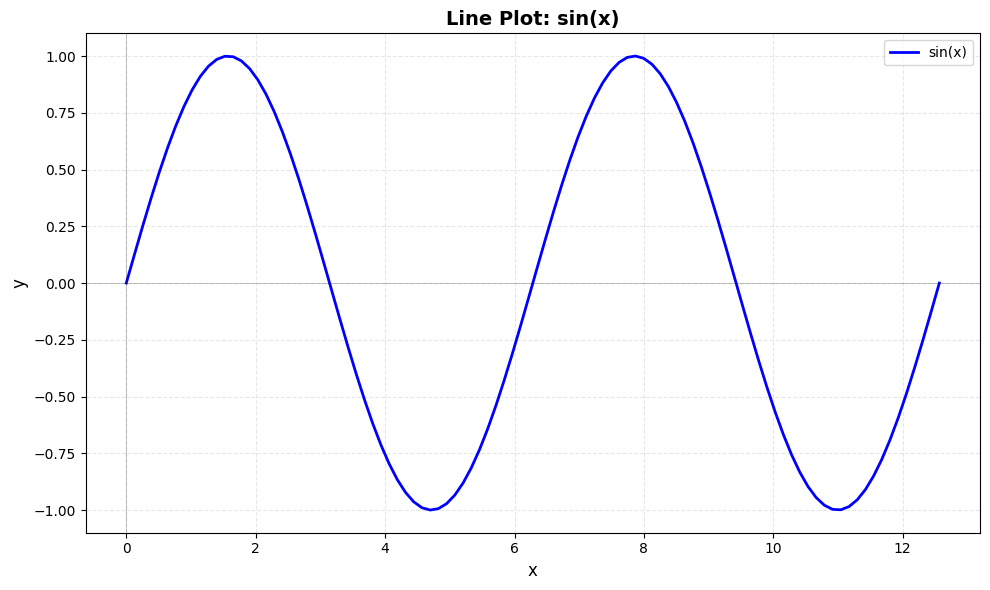

📊 Displaying Line plot with 100 points
📈 Function: sin(x)
🎨 Color: blue


interactive(children=(RadioButtons(description='Plot Type:', options=('Line', 'Scatter', 'Bar'), value='Line')…


🚀 Experiment with different combinations of settings!


In [15]:
# Advanced interactive plot with multiple options
from ipywidgets import interact, Dropdown, IntSlider, RadioButtons

def interactive_multi_plot(plot_type='Line', function='sin', n_points=100, color='blue'):
    """
    Create different types of plots with various functions
    
    Parameters:
    - plot_type: Type of plot (Line, Scatter, Bar)
    - function: Mathematical function to plot
    - n_points: Number of data points
    - color: Color of the plot
    """
    # Generate x values based on plot type
    if plot_type == 'Bar':
        x = np.arange(min(20, n_points))  # Limit bars for readability
    else:
        x = np.linspace(0, 4 * np.pi, n_points)
    
    # Calculate y values based on selected function
    if function == 'sin':
        y = np.sin(x)
        func_label = 'sin(x)'
    elif function == 'cos':
        y = np.cos(x)
        func_label = 'cos(x)'
    elif function == 'exp':
        y = np.exp(-x/5) * np.cos(x)
        func_label = 'e^(-x/5) * cos(x)'
    elif function == 'quadratic':
        y = -0.1 * (x - 2*np.pi)**2 + 2
        func_label = '-0.1(x - 2π)² + 2'
    else:  # linear
        y = 0.2 * x - 1
        func_label = '0.2x - 1'
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot based on selected type
    if plot_type == 'Line':
        ax.plot(x, y, color=color, linewidth=2, label=func_label)
    elif plot_type == 'Scatter':
        ax.scatter(x, y, color=color, alpha=0.6, s=20, label=func_label)
    else:  # Bar
        ax.bar(x, y, color=color, alpha=0.7, label=func_label, width=0.5)
    
    # Customize plot
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(f'{plot_type} Plot: {func_label}', fontsize=14, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Add zero lines
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Display info
    print(f"📊 Displaying {plot_type} plot with {n_points} points")
    print(f"📈 Function: {func_label}")
    print(f"🎨 Color: {color}")

# Create interactive interface with various widgets
interact(interactive_multi_plot,
         plot_type=RadioButtons(options=['Line', 'Scatter', 'Bar'],
                                value='Line',
                                description='Plot Type:'),
         function=Dropdown(options=['sin', 'cos', 'exp', 'quadratic', 'linear'],
                          value='sin',
                          description='Function:'),
         n_points=IntSlider(value=100, min=10, max=500, step=10,
                           description='Points:',
                           continuous_update=False),
         color=Dropdown(options=['blue', 'red', 'green', 'purple', 'orange', 'black'],
                       value='blue',
                       description='Color:'))

print("\n🚀 Experiment with different combinations of settings!")


### Example 3: Interactive Data Analysis Dashboard

This example creates a mini dashboard with:
- Statistical distribution plots
- Adjustable distribution parameters
- Real-time statistics display


In [16]:
# Statistical distribution dashboard
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown
from scipy import stats

def distribution_dashboard(distribution='Normal', param1=0.0, param2=1.0, n_samples=1000, bins=30):
    """
    Interactive dashboard for exploring statistical distributions
    
    Parameters:
    - distribution: Type of distribution
    - param1: First parameter (mean for normal, lambda for exponential, etc.)
    - param2: Second parameter (std for normal, not used for exponential)
    - n_samples: Number of samples to generate
    - bins: Number of histogram bins
    """
    # Generate samples based on distribution
    if distribution == 'Normal':
        data = np.random.normal(param1, param2, n_samples)
        dist_name = f'Normal(μ={param1:.1f}, σ={param2:.1f})'
        x_theory = np.linspace(data.min(), data.max(), 100)
        y_theory = stats.norm.pdf(x_theory, param1, param2)
    elif distribution == 'Exponential':
        data = np.random.exponential(1/max(0.1, param1), n_samples)
        dist_name = f'Exponential(λ={param1:.1f})'
        x_theory = np.linspace(0, data.max(), 100)
        y_theory = stats.expon.pdf(x_theory, scale=1/max(0.1, param1))
    elif distribution == 'Uniform':
        data = np.random.uniform(param1, param1 + param2, n_samples)
        dist_name = f'Uniform([{param1:.1f}, {param1+param2:.1f}])'
        x_theory = np.linspace(param1, param1 + param2, 100)
        y_theory = stats.uniform.pdf(x_theory, param1, param2)
    else:  # Beta
        alpha = max(0.1, param1)
        beta = max(0.1, param2)
        data = np.random.beta(alpha, beta, n_samples)
        dist_name = f'Beta(α={alpha:.1f}, β={beta:.1f})'
        x_theory = np.linspace(0, 1, 100)
        y_theory = stats.beta.pdf(x_theory, alpha, beta)
    
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Histogram with theoretical distribution overlay
    axes[0].hist(data, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0].plot(x_theory, y_theory, 'r-', linewidth=2, label='Theoretical')
    axes[0].set_title(f'Histogram: {dist_name}', fontweight='bold')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Density')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 2. Box plot
    box = axes[1].boxplot(data, vert=True, patch_artist=True)
    box['boxes'][0].set_facecolor('lightgreen')
    axes[1].set_title('Box Plot', fontweight='bold')
    axes[1].set_ylabel('Value')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # 3. Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[2])
    axes[2].set_title('Q-Q Plot (Normal)', fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Display statistics
    print("📊 Statistical Summary:")
    print("─" * 40)
    print(f"Distribution: {dist_name}")
    print(f"Sample Size: {n_samples}")
    print(f"Mean: {np.mean(data):.3f}")
    print(f"Median: {np.median(data):.3f}")
    print(f"Std Dev: {np.std(data):.3f}")
    print(f"Min: {np.min(data):.3f}")
    print(f"Max: {np.max(data):.3f}")
    print(f"25th Percentile: {np.percentile(data, 25):.3f}")
    print(f"75th Percentile: {np.percentile(data, 75):.3f}")

# Create interactive dashboard
interact(distribution_dashboard,
         distribution=Dropdown(options=['Normal', 'Exponential', 'Uniform', 'Beta'],
                              value='Normal',
                              description='Distribution:'),
         param1=FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1,
                           description='Parameter 1:',
                           continuous_update=False),
         param2=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1,
                           description='Parameter 2:',
                           continuous_update=False),
         n_samples=IntSlider(value=1000, min=100, max=5000, step=100,
                            description='Samples:',
                            continuous_update=False),
         bins=IntSlider(value=30, min=10, max=100, step=5,
                       description='Bins:',
                       continuous_update=False))

print("\n💡 Tip: Try different distributions and observe how parameters affect the shape!")


ModuleNotFoundError: No module named 'scipy'

### Example 4: Interactive 3D Surface Plot with Bokeh

This example creates an interactive 3D-like surface plot using Bokeh with widget controls.


In [17]:
# Interactive Bokeh plot with widgets
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, push_notebook
from bokeh.layouts import column, row
from bokeh.models import Slider, Select, ColorBar, LinearColorMapper
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256, Plasma256, Turbo256
import numpy as np
from ipywidgets import interact, FloatSlider, Dropdown

# Enable notebook output
output_notebook()

def create_bokeh_surface(function_type='peaks', resolution=50, colormap='Viridis'):
    """
    Create an interactive surface plot with Bokeh
    
    Parameters:
    - function_type: Type of 3D function to plot
    - resolution: Grid resolution
    - colormap: Color palette to use
    """
    # Create grid
    x = np.linspace(-3, 3, resolution)
    y = np.linspace(-3, 3, resolution)
    X, Y = np.meshgrid(x, y)
    
    # Calculate Z values based on function type
    if function_type == 'peaks':
        Z = 3*(1-X)**2 * np.exp(-(X**2) - (Y+1)**2) \
            - 10*(X/5 - X**3 - Y**5) * np.exp(-X**2 - Y**2) \
            - 1/3*np.exp(-(X+1)**2 - Y**2)
        title = "Peaks Function"
    elif function_type == 'saddle':
        Z = X**2 - Y**2
        title = "Saddle Function: z = x² - y²"
    elif function_type == 'gaussian':
        Z = np.exp(-(X**2 + Y**2))
        title = "Gaussian: z = e^(-(x² + y²))"
    else:  # ripple
        R = np.sqrt(X**2 + Y**2)
        Z = np.sin(5*R) / (R + 0.1)
        title = "Ripple: z = sin(5r) / r"
    
    # Flatten arrays for Bokeh
    x_flat = X.flatten()
    y_flat = Y.flatten()
    z_flat = Z.flatten()
    
    # Select color palette
    if colormap == 'Plasma':
        palette = Plasma256
    elif colormap == 'Turbo':
        palette = Turbo256
    else:
        palette = Viridis256
    
    # Create color mapper
    mapper = LinearColorMapper(palette=palette, low=z_flat.min(), high=z_flat.max())
    
    # Create figure
    p = figure(
        title=title,
        width=700,
        height=600,
        tools="pan,wheel_zoom,box_zoom,reset,hover,save",
        tooltips=[("x", "@x{0.00}"), ("y", "@y{0.00}"), ("z", "@z{0.00}")]
    )
    
    # Add scatter plot with color mapping
    p.scatter(
        x_flat, y_flat,
        size=8,
        color={'field': 'z', 'transform': mapper},
        alpha=0.8,
        source={'x': x_flat, 'y': y_flat, 'z': z_flat}
    )
    
    # Add color bar
    color_bar = ColorBar(color_mapper=mapper, width=8, location=(0,0))
    p.add_layout(color_bar, 'right')
    
    # Customize plot
    p.xaxis.axis_label = "X"
    p.yaxis.axis_label = "Y"
    
    # Show plot
    show(p)
    
    # Display info
    print(f"📊 3D Surface Plot: {title}")
    print(f"🎨 Colormap: {colormap}")
    print(f"📏 Resolution: {resolution}x{resolution} grid")
    print(f"📈 Z range: [{z_flat.min():.2f}, {z_flat.max():.2f}]")

# Create interactive interface
interact(create_bokeh_surface,
         function_type=Dropdown(
             options=['peaks', 'saddle', 'gaussian', 'ripple'],
             value='peaks',
             description='Function:'),
         resolution=IntSlider(
             value=50, min=20, max=100, step=10,
             description='Resolution:',
             continuous_update=False),
         colormap=Dropdown(
             options=['Viridis', 'Plasma', 'Turbo'],
             value='Viridis',
             description='Colormap:'))

print("\n🔍 Use the controls above to explore different 3D functions!")


RuntimeError: 

Expected x and y to reference fields in the supplied data source.

When a 'source' argument is passed to a glyph method, values that are sequences
(like lists or arrays) must come from references to data columns in the source.

For instance, as an example:

    source = ColumnDataSource(data=dict(x=a_list, y=an_array))

    p.scatter(x='x', y='y', source=source, ...) # pass column names and a source

Alternatively, *all* data sequences may be provided as literals as long as a
source is *not* provided:

    p.scatter(x=a_list, y=an_array, ...)  # pass actual sequences and no source



interactive(children=(Dropdown(description='Function:', options=('peaks', 'saddle', 'gaussian', 'ripple'), val…


🔍 Use the controls above to explore different 3D functions!


### Example 5: Combined Matplotlib and Widget Controls

This final example shows a more complex interactive visualization combining multiple plot types in a single dashboard.


In [19]:
# Complex dashboard with multiple interactive plots
from ipywidgets import interact_manual, FloatSlider, IntSlider, Checkbox, RadioButtons
import matplotlib.pyplot as plt
import numpy as np

def comprehensive_dashboard(wave_type='Combined', frequency=1.0, noise_level=0.0, 
                          show_fft=False, show_derivative=False, window_size=100):
    """
    Comprehensive dashboard with multiple analysis views
    
    Parameters:
    - wave_type: Type of waveform to generate
    - frequency: Base frequency of the signal
    - noise_level: Amount of noise to add
    - show_fft: Whether to show FFT analysis
    - show_derivative: Whether to show derivative
    - window_size: Number of points to display
    """
    # Generate time series
    t = np.linspace(0, 4*np.pi, window_size)
    
    # Generate base signal based on type
    if wave_type == 'Sine':
        signal = np.sin(frequency * t)
    elif wave_type == 'Square':
        signal = np.sign(np.sin(frequency * t))
    elif wave_type == 'Sawtooth':
        signal = 2 * (t * frequency / (2*np.pi) % 1) - 1
    else:  # Combined
        signal = np.sin(frequency * t) + 0.3 * np.sin(3 * frequency * t) + 0.2 * np.sin(5 * frequency * t)
    
    # Add noise
    if noise_level > 0:
        signal += np.random.normal(0, noise_level, len(t))
    
    # Determine number of subplots
    n_plots = 1 + show_fft + show_derivative
    
    # Create subplots
    fig, axes = plt.subplots(n_plots, 1, figsize=(12, 4*n_plots))
    if n_plots == 1:
        axes = [axes]
    
    # Main signal plot
    ax_idx = 0
    axes[ax_idx].plot(t, signal, 'b-', linewidth=2, label='Signal')
    axes[ax_idx].set_xlabel('Time')
    axes[ax_idx].set_ylabel('Amplitude')
    axes[ax_idx].set_title(f'{wave_type} Wave (f={frequency:.1f} Hz, Noise={noise_level:.2f})', 
                          fontsize=12, fontweight='bold')
    axes[ax_idx].grid(True, alpha=0.3)
    axes[ax_idx].legend()
    
    # Add envelope if noisy
    if noise_level > 0.1:
        from scipy.signal import hilbert
        analytic_signal = hilbert(signal)
        envelope = np.abs(analytic_signal)
        axes[ax_idx].plot(t, envelope, 'r--', alpha=0.5, label='Envelope')
        axes[ax_idx].plot(t, -envelope, 'r--', alpha=0.5)
        axes[ax_idx].legend()
    
    # FFT plot
    if show_fft:
        ax_idx += 1
        # Compute FFT
        fft_vals = np.fft.fft(signal)
        fft_freq = np.fft.fftfreq(len(signal), t[1] - t[0])
        
        # Plot only positive frequencies
        positive_freq_idx = fft_freq > 0
        axes[ax_idx].plot(fft_freq[positive_freq_idx], 
                         np.abs(fft_vals[positive_freq_idx]),
                         'g-', linewidth=2)
        axes[ax_idx].set_xlabel('Frequency (Hz)')
        axes[ax_idx].set_ylabel('Magnitude')
        axes[ax_idx].set_title('Frequency Spectrum (FFT)', fontsize=12, fontweight='bold')
        axes[ax_idx].grid(True, alpha=0.3)
        axes[ax_idx].set_xlim(0, 10)
    
    # Derivative plot
    if show_derivative:
        ax_idx += 1
        derivative = np.gradient(signal, t)
        axes[ax_idx].plot(t, derivative, 'orange', linewidth=2, label='Derivative')
        axes[ax_idx].set_xlabel('Time')
        axes[ax_idx].set_ylabel('Rate of Change')
        axes[ax_idx].set_title('Signal Derivative', fontsize=12, fontweight='bold')
        axes[ax_idx].grid(True, alpha=0.3)
        axes[ax_idx].legend()
        
        # Add zero crossing markers
        zero_crossings = np.where(np.diff(np.sign(derivative)))[0]
        if len(zero_crossings) > 0:
            axes[ax_idx].plot(t[zero_crossings], derivative[zero_crossings], 
                            'ro', markersize=5, label='Zero Crossings')
            axes[ax_idx].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Display signal statistics
    print("📊 Signal Analysis:")
    print("─" * 40)
    print(f"Signal Type: {wave_type}")
    print(f"Frequency: {frequency:.2f} Hz")
    print(f"RMS Value: {np.sqrt(np.mean(signal**2)):.3f}")
    print(f"Peak-to-Peak: {np.ptp(signal):.3f}")
    print(f"Signal-to-Noise Ratio: {np.std(signal)/max(noise_level, 0.001):.1f} dB")
    if show_derivative:
        print(f"Max Rate of Change: {np.max(np.abs(np.gradient(signal, t))):.3f}")

# Create comprehensive interactive interface
interact_manual(comprehensive_dashboard,
                wave_type=RadioButtons(
                    options=['Sine', 'Square', 'Sawtooth', 'Combined'],
                    value='Combined',
                    description='Wave Type:'),
                frequency=FloatSlider(
                    value=1.0, min=0.5, max=5.0, step=0.1,
                    description='Frequency:'),
                noise_level=FloatSlider(
                    value=0.0, min=0.0, max=1.0, step=0.05,
                    description='Noise:'),
                show_fft=Checkbox(
                    value=False,
                    description='Show FFT'),
                show_derivative=Checkbox(
                    value=False,
                    description='Show Derivative'),
                window_size=IntSlider(
                    value=100, min=50, max=500, step=50,
                    description='Points:'))

print("\n🎛️ Configure the settings above and click 'Run Interact' to update the visualization!")


interactive(children=(RadioButtons(description='Wave Type:', index=3, options=('Sine', 'Square', 'Sawtooth', '…


🎛️ Configure the settings above and click 'Run Interact' to update the visualization!
